In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras import datasets, layers, models

In [2]:
from sklearn import metrics

In [3]:
#data directory
image_dir="data/"

In [4]:
#list all directories in data folder
print(os.listdir(image_dir))

['cloudy', 'desert', 'green_area', 'water']


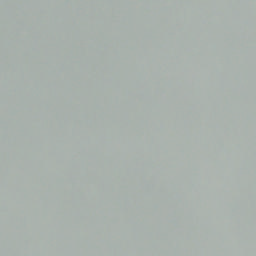

In [5]:
#display sample image from cloudy folder
load_img(image_dir+"/cloudy/train_17406.jpg")

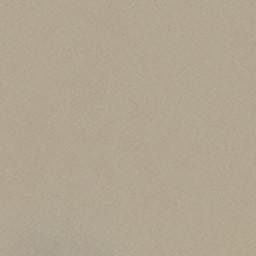

In [6]:
#display sample image from desert folder
load_img(image_dir+"/desert/desert(999).jpg")

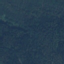

In [7]:
#display sample image from green_area folder
load_img(image_dir+"/green_area/Forest_396.jpg")

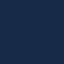

In [8]:
#display sample image from water folder
load_img(image_dir+"/water/SeaLake_1018.jpg")

Text(0, 0.5, 'No. of images')

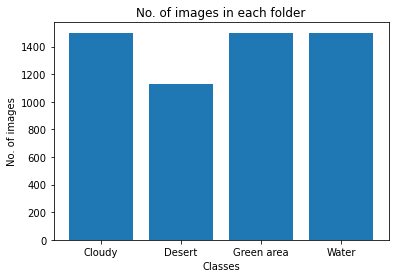

In [9]:
x=['Cloudy','Desert','Green area','Water']
y=[len(os.listdir(image_dir+"/cloudy")),
   len(os.listdir(image_dir+"/desert")),
   len(os.listdir(image_dir+"/green_area")),
   len(os.listdir(image_dir+"/water"))]
plt.bar(x,y)
plt.title("No. of images in each folder")
plt.xlabel("Classes")
plt.ylabel("No. of images")

In [10]:
#rescale images and get train data
genT=ImageDataGenerator(rescale=1./255,validation_split=0.2)
dataT=genT.flow_from_directory(image_dir,
                               target_size=(64,64),batch_size=32,class_mode='categorical',
                               shuffle=True,subset='training')

Found 4505 images belonging to 4 classes.


In [11]:
#get test data
datat=genT.flow_from_directory(image_dir,
                               target_size=(64,64),batch_size=1,
                               shuffle=False,subset='validation')

Found 1126 images belonging to 4 classes.


In [12]:
#shape of train data
for img,lbl in next(zip(dataT)):
    for i in range(1):
        image_arr = np.array(img[i])
        print(image_arr.shape)
        break

(64, 64, 3)


In [13]:
#shape of test data
for img,lbl in next(zip(datat)):
    for i in range(1):
        image_arr = np.array(img[i])
        print(image_arr.shape)
        break

(64, 64, 3)


# CNN First Model

In [14]:
no_of_classes=4

In [15]:
#create first model
modCNN=Sequential()
modCNN.add(Conv2D(33,(3,3),strides = 2,activation = 'relu',padding = 'valid',input_shape=(64,64,3)))
modCNN.add(MaxPooling2D(2,2))
modCNN.add(Conv2D(45,(3,3),strides = 2,activation = 'relu',padding = 'same'))
modCNN.add(MaxPooling2D(2,2))
modCNN.add(Flatten())
modCNN.add(Dense(60,activation = 'relu'))
modCNN.add(Dense(no_of_classes,activation = 'softmax'))
modCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 33)        924       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 33)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 45)          13410     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 45)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 720)               0         
                                                                 
 dense (Dense)               (None, 60)                4

In [16]:
#compile model
modCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
#fit model
mod_hist=modCNN.fit(dataT,validation_data=datat,epochs=10)

Epoch 1/10
141/141 [==============================] - 7s 42ms/step - loss: 0.5769 - accuracy: 0.7383 - val_loss: 0.4169 - val_accuracy: 0.8091
Epoch 2/10
141/141 [==============================] - 6s 40ms/step - loss: 0.3956 - accuracy: 0.8315 - val_loss: 0.4234 - val_accuracy: 0.8197
Epoch 3/10
141/141 [==============================] - 6s 40ms/step - loss: 0.3923 - accuracy: 0.8320 - val_loss: 0.3758 - val_accuracy: 0.8384
Epoch 4/10
141/141 [==============================] - 6s 40ms/step - loss: 0.3506 - accuracy: 0.8557 - val_loss: 0.3515 - val_accuracy: 0.8561
Epoch 5/10
141/141 [==============================] - 6s 40ms/step - loss: 0.3344 - accuracy: 0.8650 - val_loss: 0.2803 - val_accuracy: 0.8863
Epoch 6/10
141/141 [==============================] - 6s 41ms/step - loss: 0.2981 - accuracy: 0.8795 - val_loss: 0.4837 - val_accuracy: 0.8179
Epoch 7/10
141/141 [==============================] - 6s 41ms/step - loss: 0.2872 - accuracy: 0.8852 - val_loss: 0.2713 - val_accuracy: 0.8623

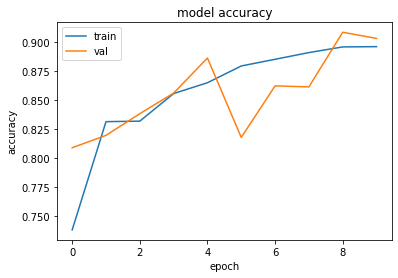

In [18]:
##plot model 1 accuracy
plt.plot(mod_hist.history['accuracy'])
plt.plot(mod_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

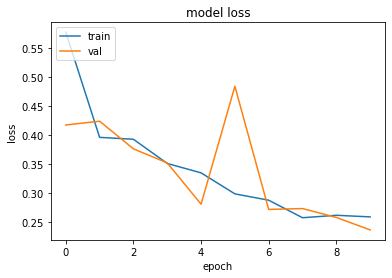

In [19]:
##plot model 1 loss
plt.plot(mod_hist.history['loss'])
plt.plot(mod_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
#predict 
predCNN = modCNN.predict(datat).argmax(axis=1)
predCNN

1126/1126 [==============================] - 2s 1ms/step


array([0, 0, 0, ..., 3, 2, 3], dtype=int64)

In [21]:
#class indexes
dataT.class_indices

{'cloudy': 0, 'desert': 1, 'green_area': 2, 'water': 3}

In [22]:
#predict desert image class
image = cv2.imread(image_dir+"/desert/desert(14).jpg")
image = cv2.resize(image,(64,64))
image = image/255.0
image = image.reshape(-1,64,64,3)
np.round(modCNN.predict(image)).argmax(axis=1)

1/1 [==============================] - 0s 62ms/step


array([3], dtype=int64)

In [23]:
#predict forest image class
image = cv2.imread(image_dir+"/green_area/Forest_3.jpg")
image = cv2.resize(image,(64,64))
image = image/255.0
image = image.reshape(-1,64,64,3)
np.round(modCNN.predict(image)).argmax(axis=1)

1/1 [==============================] - 0s 15ms/step


array([0], dtype=int64)

# CNN second model 

In [24]:
#cnn second model
modCNN2 = keras.models.Sequential()
modCNN2.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(64,64,3)))
modCNN2.add(MaxPooling2D(2,2))
modCNN2.add(Conv2D(64,(3,3),activation = 'relu'))
modCNN2.add(MaxPooling2D(2,2))
modCNN2.add(Conv2D(128,(3,3),activation = 'relu'))
modCNN2.add(MaxPooling2D(2,2))
modCNN2.add(Conv2D(256,(3,3),activation = 'relu'))
modCNN2.add(MaxPooling2D(2,2))
modCNN2.add(Flatten()) 
modCNN2.add(Dense(100,activation = 'relu'))
modCNN2.add(Dense(no_of_classes,activation = 'softmax'))
modCNN2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)       

In [25]:
#compile
modCNN2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#fit epochs=20
mod_hist2=modCNN2.fit(dataT,validation_data=datat,epochs=20)

Epoch 1/20
141/141 [==============================] - 14s 95ms/step - loss: 0.6311 - accuracy: 0.6437 - val_loss: 0.5886 - val_accuracy: 0.6998
Epoch 2/20
141/141 [==============================] - 13s 94ms/step - loss: 0.4643 - accuracy: 0.7691 - val_loss: 0.3483 - val_accuracy: 0.8552
Epoch 3/20
141/141 [==============================] - 13s 95ms/step - loss: 0.3660 - accuracy: 0.8473 - val_loss: 0.3211 - val_accuracy: 0.8659
Epoch 4/20
141/141 [==============================] - 13s 94ms/step - loss: 0.3280 - accuracy: 0.8533 - val_loss: 0.3708 - val_accuracy: 0.8535
Epoch 5/20
141/141 [==============================] - 13s 94ms/step - loss: 0.3124 - accuracy: 0.8670 - val_loss: 0.2986 - val_accuracy: 0.8677
Epoch 6/20
141/141 [==============================] - 13s 94ms/step - loss: 0.2871 - accuracy: 0.8795 - val_loss: 0.2620 - val_accuracy: 0.8961
Epoch 7/20
141/141 [==============================] - 13s 95ms/step - loss: 0.2742 - accuracy: 0.8828 - val_loss: 0.3611 - val_accuracy:

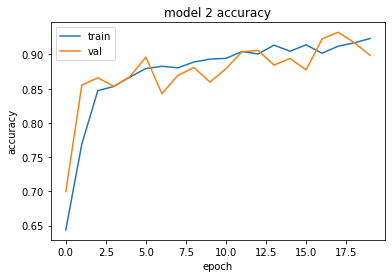

In [26]:
#plot model 2 accuracy
plt.plot(mod_hist2.history['accuracy'])
plt.plot(mod_hist2.history['val_accuracy'])
plt.title('model 2 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

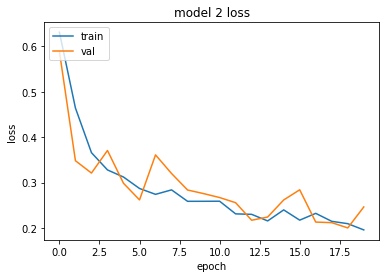

In [27]:
#plot model 2 loss
plt.plot(mod_hist2.history['loss'])
plt.plot(mod_hist2.history['val_loss'])
plt.title('model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [28]:
#predict
predCNN = modCNN2.predict(datat).argmax(axis=1)
predCNN

1126/1126 [==============================] - 3s 2ms/step


array([0, 0, 0, ..., 3, 2, 3], dtype=int64)

In [29]:
#predict desert image class
image = cv2.imread(image_dir+"/desert/desert(14).jpg")
image = cv2.resize(image,(64,64))
image = image/255.0
image = image.reshape(-1,64,64,3)
np.round(modCNN2.predict(image)).argmax(axis=1)

1/1 [==============================] - 0s 66ms/step


array([2], dtype=int64)

In [30]:
#predict forest image class
image = cv2.imread(image_dir+"/green_area/Forest_3.jpg")
image = cv2.resize(image,(64,64))
image = image/255.0
image = image.reshape(-1,64,64,3)
np.round(modCNN2.predict(image)).argmax(axis=1)

1/1 [==============================] - 0s 17ms/step


array([0], dtype=int64)